In [4]:
import pandas_datareader as pdr
key="e4551cbff1d29666d6fd3e47a901c540da4078da"

In [5]:
df = pdr.get_data_tiingo('GOOG', api_key=key)

In [6]:
df.to_csv('GOOG.csv')

In [7]:
import pandas as pd

In [8]:
df=pd.read_csv('GOOG.csv')

In [9]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2015-09-17 00:00:00+00:00,642.90,650.90,635.02,637.79,2274690,642.90,650.90,635.02,637.79,2274690,0.0,1.0
1,GOOG,2015-09-18 00:00:00+00:00,629.25,640.00,627.02,636.79,5133386,629.25,640.00,627.02,636.79,5133386,0.0,1.0
2,GOOG,2015-09-21 00:00:00+00:00,635.44,636.49,625.94,634.40,1788506,635.44,636.49,625.94,634.40,1788506,0.0,1.0
3,GOOG,2015-09-22 00:00:00+00:00,622.69,627.55,615.43,627.00,2562869,622.69,627.55,615.43,627.00,2562869,0.0,1.0
4,GOOG,2015-09-23 00:00:00+00:00,622.36,628.93,620.00,622.05,1470949,622.36,628.93,620.00,622.05,1470949,0.0,1.0


In [10]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,GOOG,2020-09-08 00:00:00+00:00,1532.39,1563.8650,1528.0100,1533.510,2610884,1532.39,1563.8650,1528.0100,1533.510,2610884,0.0,1.0
1253,GOOG,2020-09-09 00:00:00+00:00,1556.96,1569.0000,1536.0511,1557.530,1774704,1556.96,1569.0000,1536.0511,1557.530,1774704,0.0,1.0
1254,GOOG,2020-09-10 00:00:00+00:00,1532.02,1584.0810,1525.8050,1560.640,1618557,1532.02,1584.0810,1525.8050,1560.640,1618557,0.0,1.0
1255,GOOG,2020-09-11 00:00:00+00:00,1520.72,1575.2000,1497.3600,1536.000,1597087,1520.72,1575.2000,1497.3600,1536.000,1597087,0.0,1.0
1256,GOOG,2020-09-14 00:00:00+00:00,1519.28,1563.9999,1515.7400,1539.005,1696589,1519.28,1563.9999,1515.7400,1539.005,1696589,0.0,1.0


In [11]:
df1=df.reset_index()['close']

In [12]:
df1

0        642.90
1        629.25
2        635.44
3        622.69
4        622.36
         ...   
1252    1532.39
1253    1556.96
1254    1532.02
1255    1520.72
1256    1519.28
Name: close, Length: 1257, dtype: float64

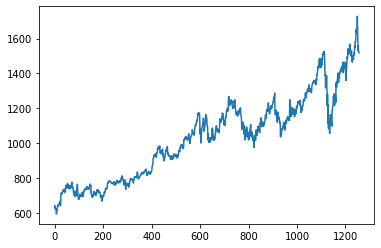

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [14]:
import numpy as np

In [15]:
df1

0        642.90
1        629.25
2        635.44
3        622.69
4        622.36
         ...   
1252    1532.39
1253    1556.96
1254    1532.02
1255    1520.72
1256    1519.28
Name: close, Length: 1257, dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
print(df1)

[[0.04235965]
 [0.03031613]
 [0.03577762]
 ...
 [0.82683807]
 [0.81686798]
 [0.81559746]]


In [18]:
##splitting into train and test 
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(817, 440)

In [20]:
train_data

array([[4.23596467e-02],
       [3.03161313e-02],
       [3.57776229e-02],
       [2.45281854e-02],
       [2.42370234e-02],
       [2.72721658e-02],
       [1.50698347e-02],
       [0.00000000e+00],
       [7.05847061e-05],
       [1.19376384e-02],
       [1.44698647e-02],
       [2.82515286e-02],
       [4.10979451e-02],
       [4.46007111e-02],
       [4.18832000e-02],
       [3.90598117e-02],
       [4.29860860e-02],
       [4.56859510e-02],
       [5.06533497e-02],
       [4.96475176e-02],
       [5.89823450e-02],
       [5.93882071e-02],
       [6.28292115e-02],
       [4.88710859e-02],
       [4.21037772e-02],
       [5.02033722e-02],
       [9.45040983e-02],
       [1.04015387e-01],
       [1.00230283e-01],
       [1.04165380e-01],
       [1.07668146e-01],
       [1.02277239e-01],
       [1.11365020e-01],
       [1.12291444e-01],
       [1.17541182e-01],
       [1.20311631e-01],
       [1.22526227e-01],
       [1.14700147e-01],
       [1.17726467e-01],
       [1.23973213e-01],


In [22]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [25]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [26]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 273ms/step - loss: 0.0352 - val_loss: 0.0417
Epoch 2/100
12/12 [==============================] - 1s 121ms/step - loss: 0.0053 - val_loss: 0.0057
Epoch 3/100
12/12 [==============================] - 1s 121ms/step - loss: 0.0026 - val_loss: 0.0087
Epoch 4/100
12/12 [==============================] - 2s 129ms/step - loss: 0.0013 - val_loss: 0.0077
Epoch 5/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 6/100
12/12 [==============================] - 1s 122ms/step - loss: 9.2915e-04 - val_loss: 0.0054
Epoch 7/100
12/12 [==============================] - 2s 127ms/step - loss: 9.3025e-04 - val_loss: 0.0055
Epoch 8/100
12/12 [==============================] - 1s 122ms/step - loss: 8.8860e-04 - val_loss: 0.0056
Epoch 9/100
12/12 [==============================] - 1s 122ms/step - loss: 9.2839e-04 - val_loss: 0.0056
Epoch 10/100
12/12 [==============================] - 2s 127ms/step - loss:

12/12 [==============================] - 2s 137ms/step - loss: 4.6423e-04 - val_loss: 0.0021
Epoch 79/100
12/12 [==============================] - 2s 132ms/step - loss: 4.6870e-04 - val_loss: 0.0029
Epoch 80/100
12/12 [==============================] - 2s 134ms/step - loss: 4.6465e-04 - val_loss: 0.0017
Epoch 81/100
12/12 [==============================] - 2s 141ms/step - loss: 4.3844e-04 - val_loss: 0.0030
Epoch 82/100
12/12 [==============================] - 2s 138ms/step - loss: 4.4778e-04 - val_loss: 0.0028
Epoch 83/100
12/12 [==============================] - 2s 140ms/step - loss: 4.6926e-04 - val_loss: 0.0017
Epoch 84/100
12/12 [==============================] - 2s 130ms/step - loss: 4.4234e-04 - val_loss: 0.0033
Epoch 85/100
12/12 [==============================] - 2s 152ms/step - loss: 4.9871e-04 - val_loss: 0.0017
Epoch 86/100
12/12 [==============================] - 2s 174ms/step - loss: 4.0915e-04 - val_loss: 0.0018
Epoch 87/100
12/12 [==============================] - 1s 12

In [32]:
import tensorflow as tf

In [37]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [38]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [39]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

952.2978025820455

In [40]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1306.7487113310758

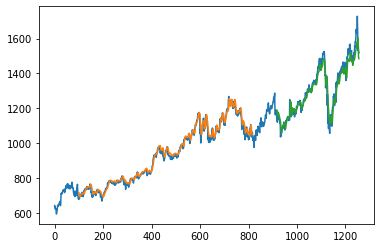

In [41]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [42]:
len(test_data)

440

In [43]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [44]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [45]:
temp_input

[0.6038698065096745,
 0.600843487237403,
 0.5636012317031208,
 0.6587229462056311,
 0.6650579235744097,
 0.6403091610125377,
 0.6457706526438384,
 0.6672195801974606,
 0.6638579835714097,
 0.6861451045094805,
 0.7000944070443537,
 0.7132319854595507,
 0.6889508465753184,
 0.6656490704876522,
 0.6716487705026516,
 0.6867009590696936,
 0.6961857789463469,
 0.6869568286291569,
 0.7162847739965944,
 0.7128261233997125,
 0.7195493166518147,
 0.7253725549016669,
 0.7260960481387696,
 0.7251166853422036,
 0.7358720299279154,
 0.7384307255225474,
 0.7449598108329879,
 0.7424540537679,
 0.7211021801851086,
 0.7442274945076278,
 0.7514800730551708,
 0.7599061223409419,
 0.7684556948623157,
 0.7137437245784769,
 0.7219844890108437,
 0.7278694888784972,
 0.748047891723061,
 0.7554592858592365,
 0.7420834840610911,
 0.738342494639974,
 0.7561121943902805,
 0.7671851701532572,
 0.7385630718464079,
 0.7468214824552891,
 0.6749750747756732,
 0.7059176452942061,
 0.7223638818059096,
 0.7439186864186204

In [49]:
len(temp_input)

99

In [50]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

ValueError: cannot reshape array of size 99 into shape (1,100,1)

In [51]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [52]:
import matplotlib.pyplot as plt

In [53]:
len(df1)

1257

ValueError: x and y must have same first dimension, but have shapes (100,) and (99, 1)

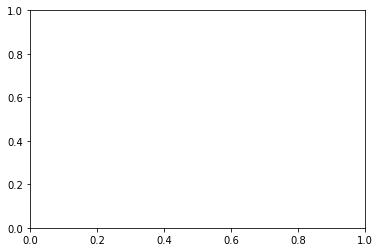

In [54]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))